<a href="https://colab.research.google.com/github/dimakpa/DL_Projects/blob/main/CifrKaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEPHI/CifrKaf/classification_2_2808.csv"))

df.head()

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9509 non-null   float64
 1   sex         9509 non-null   object 
 2   profession  10000 non-null  object 
 3   income      10000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df.shape

(10000, 4)

Посмотрим на пропущенные значения

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
miss_values = missing_values_table(df)
miss_values

Your selected dataframe has 4 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
age,491,4.9
sex,491,4.9


In [ ]:
df.head()

,age,sex,profession,income
0,29.0,female,worker,low
1,36.0,female,homewife,low
2,34.0,female,homewife,low
3,37.0,female,homewife,low
4,30.0,female,worker,low


In [ ]:
df['income'].unique()

array(['low', 'high'], dtype=object)

In [ ]:
df['age'] = df['age']. fillna(df['age'].mean())
# df['sex'] = df['sex']. fillna(df['sex'].mean())
miss_values = missing_values_table(df)
miss_values

Your selected dataframe has 4 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
sex,491,4.9


<Axes: xlabel='profession', ylabel='count'>

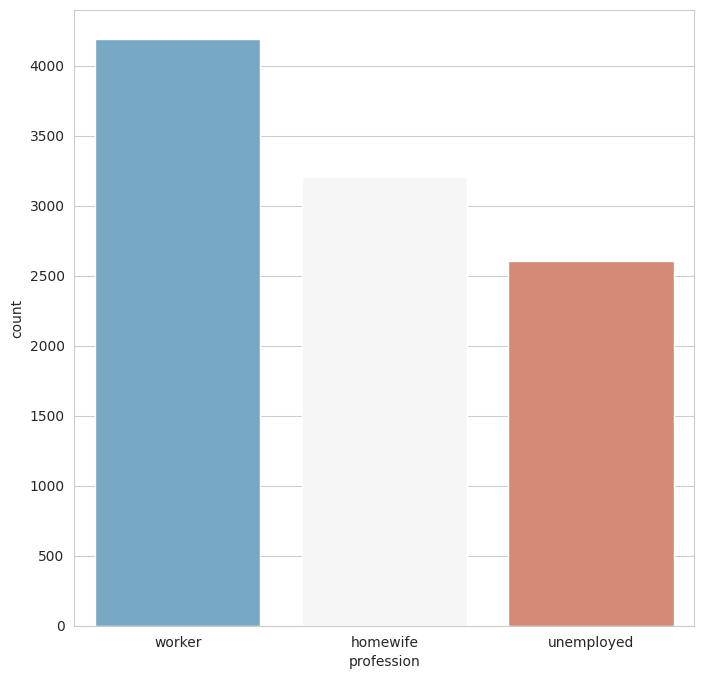

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='profession',data=df,palette='RdBu_r')

<Axes: xlabel='sex', ylabel='count'>

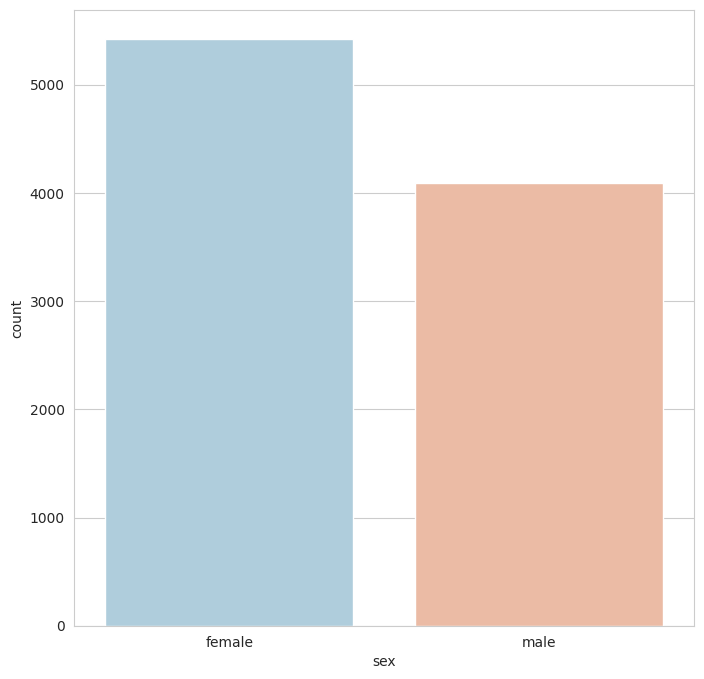

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df,palette='RdBu_r')

<Axes: xlabel='income', ylabel='count'>

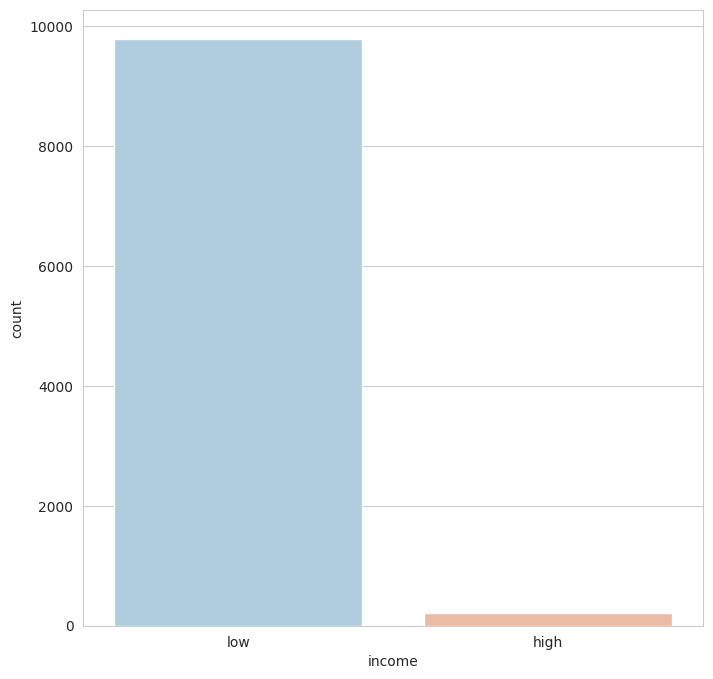

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='income',data=df,palette='RdBu_r')

In [ ]:
df['income'].value_counts()

low     9781
high     219
Name: income, dtype: int64

In [ ]:
# from sklearn.utils import resample

# df_a = df[df['income'] == 'high']
# df_b = df[df['income'] == 'low']

# df_a = resample (df_a, n_samples=9000)

# df = pd.concat([df_a, df_b])
# df.head()

In [ ]:
df['income'].value_counts()

low     9781
high     219
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

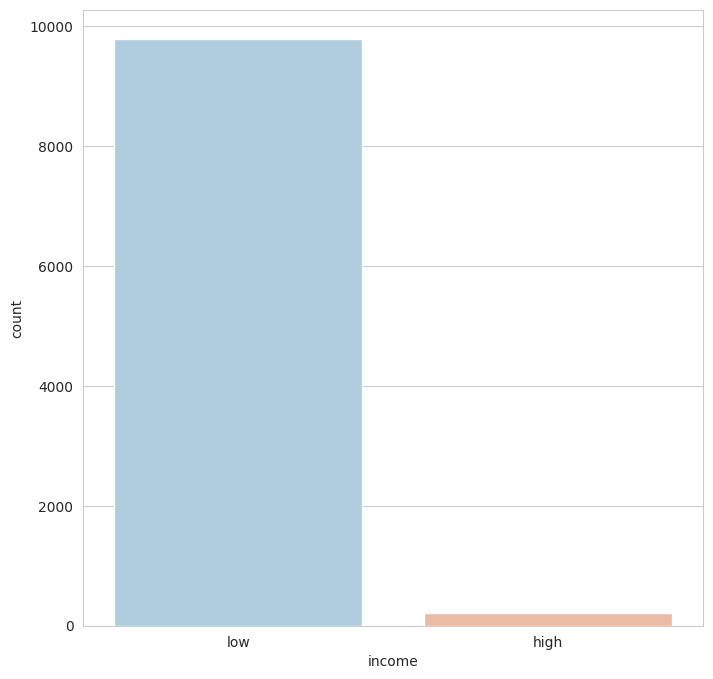

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='income',data=df,palette='RdBu_r')

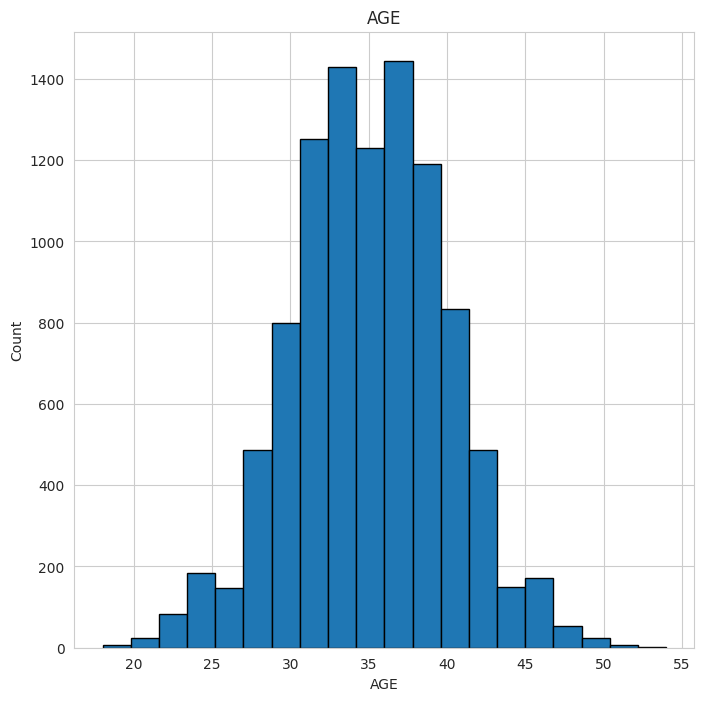

In [ ]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(8, 8)
plt.hist(df['age'], bins = 20, edgecolor = 'black');
plt.xlabel('AGE');
plt.ylabel('Count'); plt.title('AGE');

Оценим корреляцию

In [ ]:
correlations_data = df.corr()['age'].sort_values()
correlations_data

<ipython-input-330-407d26b32f1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = df.corr()['age'].sort_values()


age    1.0
Name: age, dtype: float64

In [ ]:
import random

test_list = ['male', 'female']

df['sex'] = df['sex'].fillna(random.choice(test_list))

In [ ]:
miss_values = missing_values_table(df)
miss_values

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
duplicateRows = df[df.duplicated ()]
duplicateRows

,age,sex,profession,income
7,36.000000,female,homewife,low
17,35.000000,female,homewife,low
20,31.000000,female,homewife,low
22,29.000000,female,worker,low
23,36.000000,female,homewife,low
...,...,...,...,...
9995,36.000000,male,unemployed,low
9996,34.955726,female,worker,low
9997,38.000000,male,worker,low
9998,38.000000,male,unemployed,low


In [ ]:
df.head(10)

,age,sex,profession,income
0,29.0,female,worker,low
1,36.0,female,homewife,low
2,34.0,female,homewife,low
3,37.0,female,homewife,low
4,30.0,female,worker,low
5,36.0,female,unemployed,low
6,31.0,female,homewife,low
7,36.0,female,homewife,low
8,40.0,female,homewife,low
9,35.0,female,unemployed,low


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# создадим объект класса OneHotEncoder
# параметр sparse = True выдал бы результат в сжатом формате
onehotencoder = OneHotEncoder(sparse = False)

encoded_df = pd.DataFrame(onehotencoder.fit_transform(df[['sex']]))
encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,1.0,0.0
9997,0.0,1.0
9998,0.0,1.0


In [ ]:
onehotencoder.get_feature_names_out()

array(['sex_female', 'sex_male'], dtype=object)

In [ ]:
encoded_df.columns = onehotencoder.get_feature_names_out()

In [ ]:

df = df.join(encoded_df)
df.drop('sex', axis = 1, inplace = True)

In [ ]:
df.head()

,age,profession,income,sex_female,sex_male
0,29.0,worker,low,1.0,0.0
1,36.0,homewife,low,1.0,0.0
2,34.0,homewife,low,1.0,0.0
3,37.0,homewife,low,1.0,0.0
4,30.0,worker,low,1.0,0.0


In [ ]:
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df[['profession']]))
onehotencoder.get_feature_names_out()
encoded_df.columns = onehotencoder.get_feature_names_out()
df = df.join(encoded_df)
df.drop('profession', axis = 1, inplace = True)

encoded_df = pd.DataFrame(onehotencoder.fit_transform(df[['income']]))
onehotencoder.get_feature_names_out()
encoded_df.columns = onehotencoder.get_feature_names_out()
df = df.join(encoded_df)
df.drop('income', axis = 1, inplace = True)

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,sex_female,sex_male,profession_homewife,profession_unemployed,profession_worker,income_high,income_low
0,29.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,36.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,30.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Поделим наши данные на обучающую и тестовую выборки

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex_female,sex_male,profession_homewife,profession_unemployed,profession_worker,income_high,income_low
age,1.000000,-0.003090,0.003090,0.001067,-0.007462,0.005630,-0.125672,0.125672
sex_female,-0.003090,1.000000,-1.000000,0.571094,-0.158790,-0.398900,-0.160488,0.160488
sex_male,0.003090,-1.000000,1.000000,-0.571094,0.158790,0.398900,0.160488,-0.160488
profession_homewife,0.001067,0.571094,-0.571094,1.000000,-0.407724,-0.583108,-0.102766,0.102766
profession_unemployed,-0.007462,-0.158790,0.158790,-0.407724,1.000000,-0.504054,0.010785,-0.010785
profession_worker,0.005630,-0.398900,0.398900,-0.583108,-0.504054,1.000000,0.087607,-0.087607
income_high,-0.125672,-0.160488,0.160488,-0.102766,0.010785,0.087607,1.000000,-1.000000
income_low,0.125672,0.160488,-0.160488,0.102766,-0.010785,-0.087607,-1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['income_high', 'income_low'], axis=1), df['income_low'],test_size=0.3)
X_train

,age,sex_female,sex_male,profession_homewife,profession_unemployed,profession_worker
9224,34.000000,0.0,1.0,0.0,1.0,0.0
5751,40.000000,0.0,1.0,0.0,1.0,0.0
458,36.000000,1.0,0.0,1.0,0.0,0.0
947,42.000000,1.0,0.0,1.0,0.0,0.0
298,49.000000,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
6416,41.000000,0.0,1.0,0.0,1.0,0.0
5202,33.000000,1.0,0.0,1.0,0.0,0.0
8283,28.000000,0.0,1.0,0.0,1.0,0.0
103,31.000000,1.0,0.0,1.0,0.0,0.0


In [ ]:
 y_train.value_counts()

1.0    6848
0.0     152
Name: income_low, dtype: int64

In [ ]:
y_test.value_counts()

1.0    2933
0.0      67
Name: income_low, dtype: int64

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
def fit_and_evaluate(model):

    # Train the model
    model.fit(X, y)

    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)

    # Return the performance metric
    return model_mae

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg =  LogisticRegression(solver='liblinear')

logreg.fit(X_train,y_train)


# lr = LinearRegression()
# lr_mae = fit_and_evaluate(lr)

# print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tp

2933

Text(0.5, 709.5555555555555, 'Predicted label')

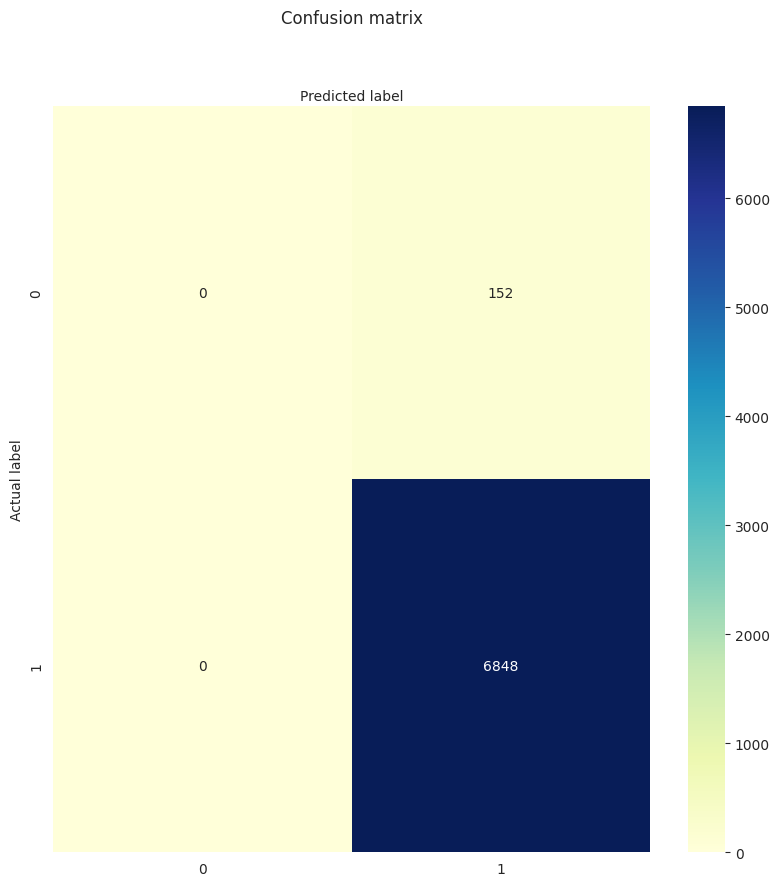

In [ ]:
class_names=["male",'female']

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['high', 'low']

print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        67
         1.0       0.98      1.00      0.99      2933

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.96      0.98      0.97      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
f1_score(y_train, logreg.predict(X_train))

0.9890236857307915

In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_train, logreg.predict(X_train)))

0.0


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))

In [ ]:
fpr.size()

TypeError: ignored

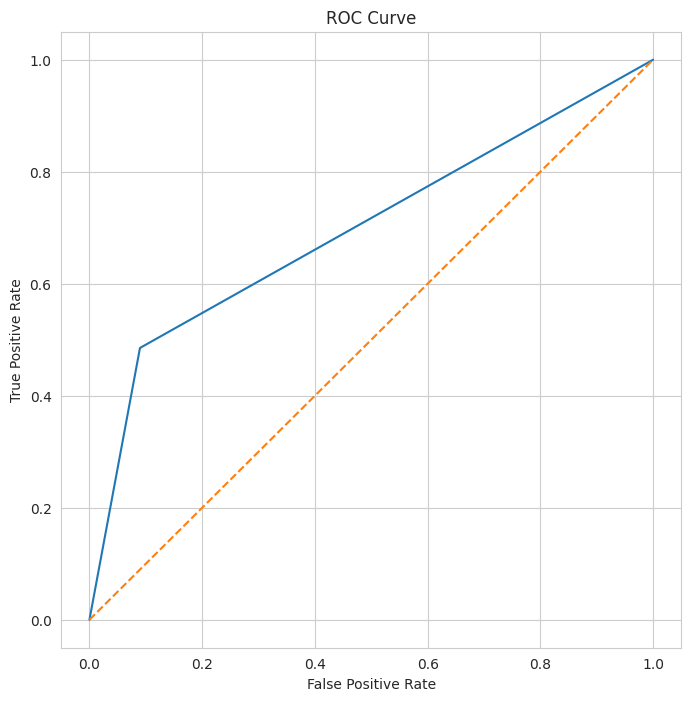

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0).fit(X_train, y_train)
# clf.score(X_test, y_test)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75      2812
         1.0       0.77      0.65      0.70      2823

    accuracy                           0.73      5635
   macro avg       0.73      0.73      0.73      5635
weighted avg       0.73      0.73      0.73      5635

